In [7]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns


In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df=pd.read_csv("/twitter_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df['labels'] = df['class'].map({0:"Hate Speech Detected",1:"Offensive Language detected",2:"No hate and offfensive language detetcted"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                      labels  
0  No hate and offfensive language detetcted  
1                Offensive Language detected  
2                Offensive Language detected  
3                Offensive Language 

In [12]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

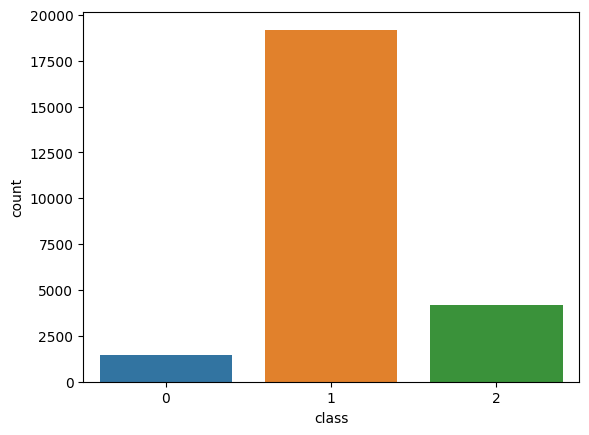

In [13]:
sns.countplot(x=df['class'])

In [14]:
df = df[['tweet','labels']]
df

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offfensive language detetcted
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language detected
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language detected
24779,"you've gone and broke the wrong heart baby, an...",No hate and offfensive language detetcted
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language detected
24781,youu got wild bitches tellin you lies,Offensive Language detected


In [15]:
from nltk.tokenize.sonority_sequencing import punctuation
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?]','',text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text = re.sub('\n', '',text)
  text = re.sub('\w*\d\w*', '',text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = " ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text
df["tweet"] = df["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                                      labels  
0  No hate and offfensive language detetcted  
1                Offensive Language detected  
2                Offensive Language detected  
3                Offensive Language detected  
4                Offensive Language detected  


In [16]:
x = np.array(df["tweet"])
y = np.array(df["labels"])

cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=50)

In [17]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, y_train)
df_pred = clf_DT.predict(X_test)
df_acc = accuracy_score(df_pred,y_test)
print(df_acc*100)

87.55349064677833


In [18]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm_dt = confusion_matrix(y_test,df_pred)
print(cm_dt)

[[ 174   42  270]
 [  36 1122  224]
 [ 252  194 5865]]


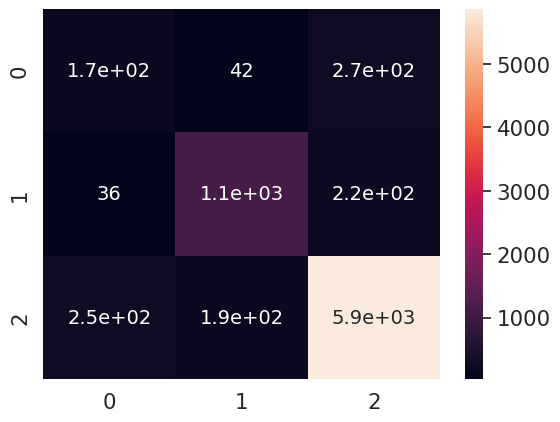

In [19]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_dt, annot=True, annot_kws={"size": 14}) # font size

plt.show()

In [20]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)
df_pred_lr = clf_lr.predict(X_test)
df_acc_lr = accuracy_score(df_pred_lr,y_test)
print(df_acc_lr*100)

89.6808900843624


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
cm_dt = confusion_matrix(y_test,df_pred_lr)
print(cm_dt)

[[ 128   45  313]
 [  13 1185  184]
 [ 123  166 6022]]


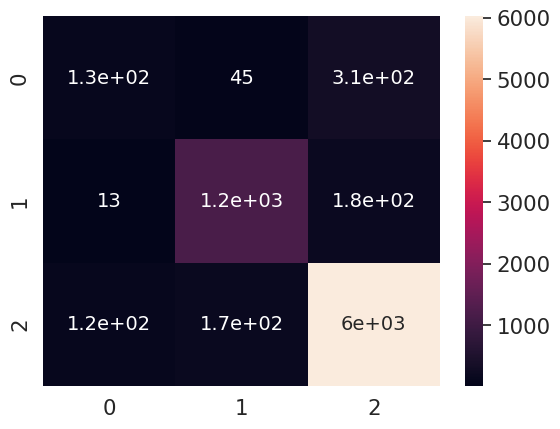

In [22]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_dt, annot=True, annot_kws={"size": 14}) # font size

plt.show()

In [23]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
df_pred_svm = clf_svm.predict(X_test)
df_acc_svm = accuracy_score(df_pred_svm,y_test)
print(df_acc_svm*100)

90.05990952439174


In [24]:
cm_dt = confusion_matrix(y_test,df_pred_svm)
print(cm_dt)

[[  21   49  416]
 [   0 1254  128]
 [   9  211 6091]]


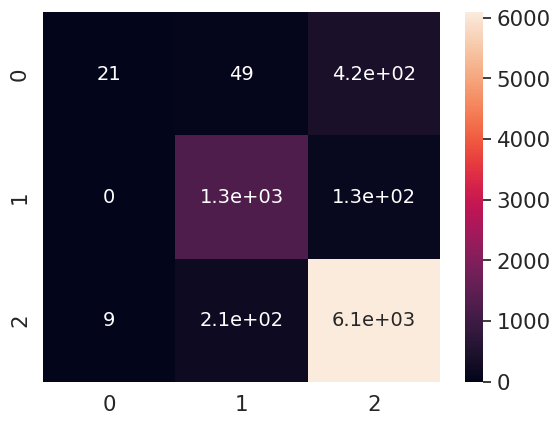

In [25]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_dt, annot=True, annot_kws={"size": 14}) # font size

plt.show()

In [26]:
test ="I do not like talking to you faggot and I did but in a nicely way fag"
df=cv.transform([test]).toarray()
print(clf_svm.predict(df))

['Hate Speech Detected']
